In [1]:
# Load data and packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
directory_path = os.getcwd() + "\\Data\\sorting_event_volumes_2023.csv"

df = pd.read_csv(directory_path)


In [2]:
# Data cleaning
print("Number of rows is: " + str(df.shape[0]))

df = df.loc[df["event_type"] == "LAJ", :]
df.drop(['event_location', 'input_belt', 'position'], axis=1, inplace = True)
df.dropna(inplace = True)
df['output_belt'] = df['output_belt'].astype(int)
df['scanning_date'] = pd.to_datetime(df['scanning_date'])

print("Number of rows cleaned data is: " + str(df.shape[0]))

Number of rows is: 8949721
Number of rows cleaned data is: 7450939


In [3]:
# Data preparation
df['day'] = df['scanning_date'].dt.day
df['month'] = df['scanning_date'].dt.month
df['weekday'] = df['scanning_date'].dt.day_of_week + 1
df['week'] = df['scanning_date'].dt.day_of_year // 7 + 1
df['yearday'] = df['scanning_date'].dt.day_of_year
df['yearday_sin'] = np.sin(df['yearday'] / 7 * 2 * np.pi)
df['yearday_cos'] = np.cos(df['yearday'] / 7 * 2 * np.pi)

sorting_center_names = df["sorting_center_name"].unique()
df["sorting_center_name"].value_counts()

VANTAA       4888466
TAMPERE      1154436
KUOPIO        578274
LIETO         443087
OULU          354047
SEINÄJOKI      32629
Name: sorting_center_name, dtype: int64

In [4]:
#aggregating data, for testing purposes
adf = df.groupby(['scanning_date','sorting_center_name'])['no_of_events'].sum().reset_index()
adf['day'] = adf['scanning_date'].dt.day
adf['month'] = adf['scanning_date'].dt.month
adf['weekday'] = adf['scanning_date'].dt.day_of_week + 1
adf['week'] = adf['scanning_date'].dt.day_of_year // 7 + 1
adf['yearday'] = adf['scanning_date'].dt.day_of_year
adf['yearday_sin'] = np.sin(adf['yearday'] / 7 * 2 * np.pi)
adf['yearday_cos'] = np.cos(adf['yearday'] / 7 * 2 * np.pi)
adf

,scanning_date,sorting_center_name,no_of_events,day,month,weekday,week,yearday,yearday_sin,yearday_cos
0,2023-01-01,LIETO,3650,1,1,7,1,1,7.818315e-01,0.623490
1,2023-01-01,OULU,1441,1,1,7,1,1,7.818315e-01,0.623490
2,2023-01-01,TAMPERE,1458,1,1,7,1,1,7.818315e-01,0.623490
3,2023-01-02,KUOPIO,23812,2,1,1,1,2,9.749279e-01,-0.222521
4,2023-01-02,LIETO,44598,2,1,1,1,2,9.749279e-01,-0.222521
...,...,...,...,...,...,...,...,...,...,...
1876,2023-12-29,OULU,19831,29,12,5,52,363,-7.818315e-01,0.623490
1877,2023-12-29,SEINÄJOKI,15100,29,12,5,52,363,-7.818315e-01,0.623490
1878,2023-12-29,TAMPERE,34499,29,12,5,52,363,-7.818315e-01,0.623490
1879,2023-12-29,VANTAA,129349,29,12,5,52,363,-7.818315e-01,0.623490


In [5]:
#missing dates: 9 april, 24 june, 24 dec, 25 dec, 31 dec

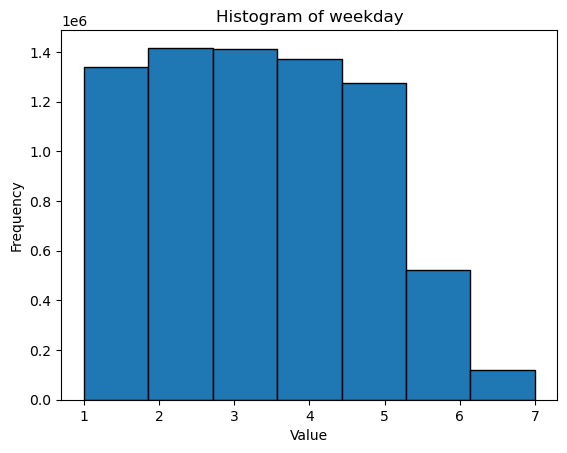

In [7]:
# Create the histogram
plt.hist(df['weekday'], bins=7, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of weekday')

# Show the plot
plt.show()

              no_of_events
no_of_events      1.000000
day               0.021900
month             0.050323
weekday          -0.289534
week              0.049091
yearday           0.052139
yearday_sin      -0.100394
yearday_cos      -0.240350


C:\Users\krist\AppData\Local\Temp\ipykernel_33860\4022224248.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_covariance_matrix = adf.corr()[['no_of_events']]


<Axes: >

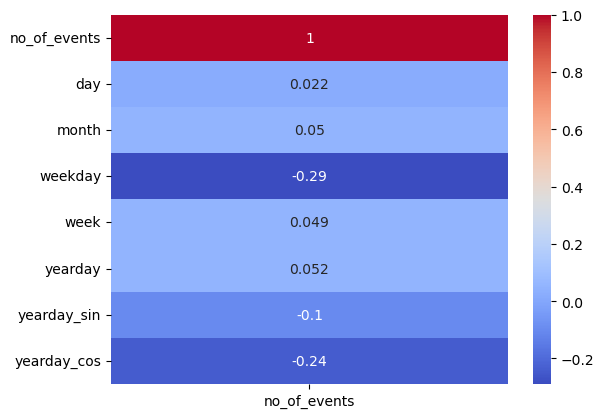

In [8]:
import seaborn as sns
#determine correlations
target_covariance_matrix = adf.corr()[['no_of_events']]
print(target_covariance_matrix)
sns.heatmap(target_covariance_matrix,annot=True, cmap='coolwarm')

In [9]:
vantaa = adf[adf['sorting_center_name'] == 'VANTAA']
vantaa

,scanning_date,sorting_center_name,no_of_events,day,month,weekday,week,yearday,yearday_sin,yearday_cos
8,2023-01-02,VANTAA,140723,2,1,1,1,2,9.749279e-01,-0.222521
14,2023-01-03,VANTAA,154829,3,1,2,1,3,4.338837e-01,-0.900969
20,2023-01-04,VANTAA,160294,4,1,3,1,4,-4.338837e-01,-0.900969
26,2023-01-05,VANTAA,144020,5,1,4,1,5,-9.749279e-01,-0.222521
28,2023-01-06,VANTAA,18913,6,1,5,1,6,-7.818315e-01,0.623490
...,...,...,...,...,...,...,...,...,...,...
1861,2023-12-26,VANTAA,119,26,12,2,52,360,4.338837e-01,-0.900969
1867,2023-12-27,VANTAA,144831,27,12,3,52,361,-4.338837e-01,-0.900969
1873,2023-12-28,VANTAA,152030,28,12,4,52,362,-9.749279e-01,-0.222521
1879,2023-12-29,VANTAA,129349,29,12,5,52,363,-7.818315e-01,0.623490


In [10]:
#starting the work on linear regression model
#test on the aggregate values of vantaa to see which features to use or not
# Create lag features (e.g., lag 1, lag 2)
def create_lag_features(series, lags):
    lagged_data = pd.DataFrame()
    for lag in range(1, lags+1):
        lagged_data[f'lag_{lag}'] = series.shift(lag)
    return lagged_data

# Create a copy of the DataFrame for the features
X = pd.DataFrame(index=vantaa.index).copy()  # Ensure it's a copy
X.loc[:, 'lag_1'] = vantaa['no_of_events'].shift(1)
X.loc[:, 'lag_2'] = vantaa['no_of_events'].shift(2)
X.loc[:, 'lag_3'] = vantaa['no_of_events'].shift(3)
X.loc[:, 'lag_4'] = vantaa['no_of_events'].shift(4)
X.loc[:, 'lag_5'] = vantaa['no_of_events'].shift(5)
X.loc[:, 'lag_6'] = vantaa['no_of_events'].shift(6)
X.loc[:, 'lag_7'] = vantaa['no_of_events'].shift(7)
# Create day_of_week feature
X['day_of_week'] = vantaa['scanning_date'].dt.day_of_week + 1

# Create cyclic features for day_of_week
X['cos_day_of_week'] = np.cos(2 * np.pi * X['day_of_week'] / 7)
X['sin_day_of_week'] = np.sin(2 * np.pi * X['day_of_week'] / 7)

# Drop NaN values after creating lag features
X.dropna(inplace=True)

print(X)
y = vantaa['no_of_events'][7:]  # Target variable is the actual series shifted by the number of lags
dates = vantaa['scanning_date'][7:]  # Corresponding dates for the target
features = ['lag_1','lag_2', 'lag_3','lag_4', 'lag_5', 'lag_6', 'lag_7', 'day_of_week', 'cos_day_of_week', 'sin_day_of_week'] 

# Split the data into train and test sets
X_train, X_rest, y_train, y_rest, dates_train, dates_rest = train_test_split(
    X, y, dates, test_size=0.25, shuffle=False
)
X_test, X_drop, y_test, y_drop, dates_test, dates_drop = train_test_split(
    X_rest, y_rest, dates_rest, test_size=0.8, shuffle=False
)

# Train the model
model = LinearRegression()
model.fit(X_train[features], y_train)

test_data = X_test.copy()  # Make a copy of the test data
predictions = []

# Recursive forecasting loop
for i in range(len(X_test)):
    # Select the current row of features (including lags)
    row_data = X_test[features].iloc[i].to_frame().T  # Keep it as a DataFrame with feature names
    
    # Make the prediction for the current step
    pred = model.predict(row_data)[0]
    
    # Append the prediction to the predictions list
    predictions.append(pred)
    
    # Now, update lag_1 with this prediction for the next step
    for lag in range(1, 8):  # Loop over the 7 lags
        if i + lag < len(X_test):
            X_test.loc[X_test.index[i + lag], f'lag_{lag}'] = pred   

# Convert predictions list to a NumPy array or DataFrame for analysis
predictions = np.array(predictions)

# Evaluate the model with the test set (ground truth vs predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Test RMSE: {rmse}")

         lag_1     lag_2     lag_3     lag_4     lag_5     lag_6     lag_7  \
40        31.0   51989.0   18913.0  144020.0  160294.0  154829.0  140723.0   
46    160507.0      31.0   51989.0   18913.0  144020.0  160294.0  154829.0   
52    201353.0  160507.0      31.0   51989.0   18913.0  144020.0  160294.0   
58    192287.0  201353.0  160507.0      31.0   51989.0   18913.0  144020.0   
64    173355.0  192287.0  201353.0  160507.0      31.0   51989.0   18913.0   
...        ...       ...       ...       ...       ...       ...       ...   
1861   21677.0  117771.0  177114.0  224659.0  256965.0  226832.0   48786.0   
1867     119.0   21677.0  117771.0  177114.0  224659.0  256965.0  226832.0   
1873  144831.0     119.0   21677.0  117771.0  177114.0  224659.0  256965.0   
1879  152030.0  144831.0     119.0   21677.0  117771.0  177114.0  224659.0   
1880  129349.0  152030.0  144831.0     119.0   21677.0  117771.0  177114.0   

      day_of_week  cos_day_of_week  sin_day_of_week  
40       

In [11]:
X_test

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,day_of_week,cos_day_of_week,sin_day_of_week
1429,161049.000000,168357.000000,172836.000000,159316.000000,2.000000,55552.000000,140013.000000,5,-0.222521,-9.749279e-01
1431,128884.280043,161049.000000,168357.000000,172836.000000,159316.000000,2.000000,55552.000000,6,0.623490,-7.818315e-01
1437,47461.672864,128884.280043,161049.000000,168357.000000,172836.000000,159316.000000,2.000000,7,1.000000,-2.449294e-16
1443,-2089.599340,47461.672864,128884.280043,161049.000000,168357.000000,172836.000000,159316.000000,1,0.623490,7.818315e-01
1449,142993.881808,-2089.599340,47461.672864,128884.280043,161049.000000,168357.000000,172836.000000,2,-0.222521,9.749279e-01
1455,161511.524270,142993.881808,-2089.599340,47461.672864,128884.280043,161049.000000,168357.000000,3,-0.900969,4.338837e-01
1461,154968.776823,161511.524270,142993.881808,-2089.599340,47461.672864,128884.280043,161049.000000,4,-0.900969,-4.338837e-01
1467,150021.350098,154968.776823,161511.524270,142993.881808,-2089.599340,47461.672864,128884.280043,5,-0.222521,-9.749279e-01
1468,125464.178464,150021.350098,154968.776823,161511.524270,142993.881808,-2089.599340,47461.672864,6,0.623490,-7.818315e-01
1473,49030.574176,125464.178464,150021.350098,154968.776823,161511.524270,142993.881808,-2089.599340,7,1.000000,-2.449294e-16


In [12]:
predictions

array([128884.28004309,  47461.67286353,  -2089.59934007, 142993.88180773,
       161511.52427005, 154968.7768233 , 150021.35009808, 125464.17846396,
        49030.57417571,  -2040.5461707 , 143752.93691803, 162075.28807227,
       154643.93114702, 149442.64418938, 125573.18564394,  48948.0273698 ])

In [13]:
y_test

1429    153489
1431     51631
1437        56
1443    162995
1449    169558
1455    159927
1461    166261
1467    153226
1468     56994
1473        14
1479    165420
1485    185995
1491    162325
1497    149263
1503    145319
1504     57446
Name: no_of_events, dtype: int64

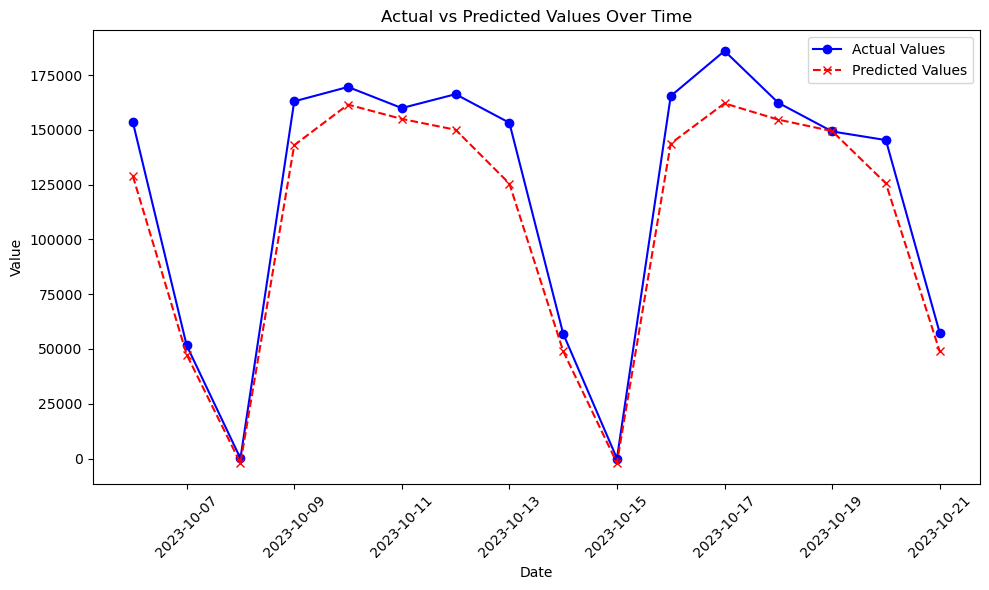

In [14]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(dates_test, y_test, label='Actual Values', color='blue', marker='o')

# Plot predicted values
plt.plot(dates_test, predictions, label='Predicted Values', color='red', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values Over Time')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [31]:
#add features to the full dataset
xdf = df.groupby(['sorting_center_name', 'scanning_date', 'output_belt'], as_index = False)['no_of_events'].sum().copy()
xdf

,sorting_center_name,scanning_date,output_belt,no_of_events
0,KUOPIO,2023-01-02,0,1439
1,KUOPIO,2023-01-02,601,552
2,KUOPIO,2023-01-02,602,695
3,KUOPIO,2023-01-02,603,187
4,KUOPIO,2023-01-02,604,395
...,...,...,...,...
188623,VANTAA,2023-12-30,96,956
188624,VANTAA,2023-12-30,97,692
188625,VANTAA,2023-12-30,98,929
188626,VANTAA,2023-12-30,99,47


In [32]:
# Create day_of_week feature
xdf['day_of_week'] = xdf['scanning_date'].dt.day_of_week + 1

# Create cyclic features for day_of_week
xdf['cos_day_of_week'] = np.cos(2 * np.pi * xdf['day_of_week'] / 7)
xdf['sin_day_of_week'] = np.sin(2 * np.pi * xdf['day_of_week'] / 7)

# Drop NaN values after creating lag features
#xdf.dropna(inplace=True)
xdf

,sorting_center_name,scanning_date,output_belt,no_of_events,day_of_week,cos_day_of_week,sin_day_of_week
0,KUOPIO,2023-01-02,0,1439,1,0.62349,0.781831
1,KUOPIO,2023-01-02,601,552,1,0.62349,0.781831
2,KUOPIO,2023-01-02,602,695,1,0.62349,0.781831
3,KUOPIO,2023-01-02,603,187,1,0.62349,0.781831
4,KUOPIO,2023-01-02,604,395,1,0.62349,0.781831
...,...,...,...,...,...,...,...
188623,VANTAA,2023-12-30,96,956,6,0.62349,-0.781831
188624,VANTAA,2023-12-30,97,692,6,0.62349,-0.781831
188625,VANTAA,2023-12-30,98,929,6,0.62349,-0.781831
188626,VANTAA,2023-12-30,99,47,6,0.62349,-0.781831


In [89]:
#define a function to calculate the predictions for a specific belt
def lingres(center, belt):
    chute = xdf[(xdf['sorting_center_name'] == center) & (xdf['output_belt'] == belt)]
    lags = 7  # You can change the number of lags
    X = create_lag_features(chute['no_of_events'], lags)

    # Create day_of_week feature
    X['day_of_week'] = chute['scanning_date'].dt.day_of_week + 1

    # Create cyclic features for day_of_week
    X['cos_day_of_week'] = np.cos(2 * np.pi * X['day_of_week'] / 7)
    X['sin_day_of_week'] = np.sin(2 * np.pi * X['day_of_week'] / 7)
    X.dropna(inplace=True)

    y = chute['no_of_events'][lags:]  # Target variable is the actual series shifted by the number of lags
    dates = chute['scanning_date'][lags:]  # Corresponding dates for the target

    # Split the data into train and test sets
    X_train, X_rest, y_train, y_rest, dates_train, dates_rest = train_test_split(
        X, y, dates, test_size=0.25, shuffle=False
    )
    X_test, X_drop, y_test, y_drop, dates_test, dates_drop = train_test_split(
        X_rest, y_rest, dates_rest, test_size=0.8, shuffle=False
    )

    # Train the model
    model = LinearRegression()
    model.fit(X_train[features], y_train)

    test_data = X_test.copy()  # Make a copy of the test data
    predictions = []

    # Recursive forecasting loop
    for i in range(len(X_test)):
        # Select the current row of features (including lags)
        row_data = X_test[features].iloc[i].to_frame().T  # Keep it as a DataFrame with feature names

        # Make the prediction for the current step
        pred = model.predict(row_data)[0]

        # Append the prediction to the predictions list
        predictions.append(pred)

        # Now, update lag_1 with this prediction for the next step
        for lag in range(1, 8):  # Loop over the 7 lags
            if i + lag < len(X_test):
                X_test.loc[X_test.index[i + lag], f'lag_{lag}'] = pred   

    # Convert predictions list to a NumPy array or DataFrame for analysis
    predictions = np.array(predictions)

    return np.array(y_test), predictions, dates_test





In [83]:
days = 14
sorting_centers = xdf["sorting_center_name"].unique()
daily_errors = {}
daily_mse = {}

for sorting_center in sorting_centers:
    output_belts = xdf[(xdf['sorting_center_name'] == sorting_center)]['output_belt'].unique()
    number_of_output_belts = len(output_belts)

    # For each output belt make forecasts
    for output_belt in output_belts:
        # Train and test the model for the given belt
        test = lingres(sorting_center, output_belt)[0]
        forecast = lingres(sorting_center, output_belt)[1]

        # Ensure both test and forecast have the same length
        if len(test) != len(forecast):
            print(f"Length mismatch for {sorting_center}, {output_belt}. Skipping...")
            continue

        # For each day, calculate the squared deviation
        for day in range(len(forecast)):
            actual = test[day]
            forecast_value = forecast[day]

            squared_deviation = (actual - forecast_value) ** 2

            # If day not in dictionary, add empty list
            if day not in daily_errors:
                daily_errors[day] = []

            daily_errors[day].append(squared_deviation)

    # Calculate for each day the average squared deviation
    for day in range(days):
        if day in daily_errors and len(daily_errors[day]) > 0:  # Check if there are errors recorded
            se = sum(daily_errors[day]) / number_of_output_belts
            daily_mse[day] = se
        else:
            daily_mse[day] = 0 

    MSE = sum(daily_mse.values()) / days
    VSE = np.var(list(daily_mse.values()), ddof=1)

    print(f"MSE for {sorting_center}: {MSE}, VSE: {VSE}")


MSE for KUOPIO: 1422.871507515077, VSE: 278744.37758745503
MSE for LIETO: 5246.486252268843, VSE: 2955392.0606001774
MSE for OULU: 7360.38283765697, VSE: 4296654.586924357
MSE for SEINÄJOKI: 30612.59559576906, VSE: 73863297.93178107
MSE for TAMPERE: 9245.227389108024, VSE: 9898850.602740522
MSE for VANTAA: 88841.2857814247, VSE: 2003479031.7015932


The next step would be to add more features to see if it improves the benchmarks.

Adding day of the week improves the results for all sorting centers.
Then adding the cosine slightly improves, but not for Lieto.
Best results by adding weekday, sine and cosine.
Then investigate the number of lags. Adding more generally improves - until around 6 day-lags.
Adding a two-week lag also slightly improves. Three-week does not.

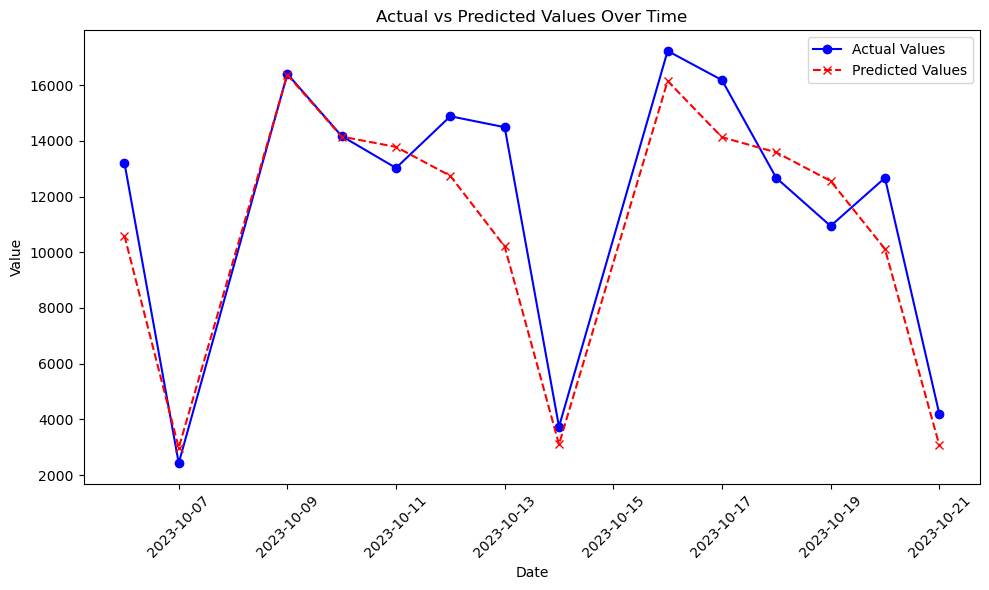

In [91]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(lingres('VANTAA', 109)[2], lingres('VANTAA',109)[0], label='Actual Values', color='blue', marker='o')

# Plot predicted values
plt.plot(lingres('VANTAA', 109)[2], lingres('VANTAA',109)[1], label='Predicted Values', color='red', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values Over Time')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()